# FACS analysis: hct116 lenti time course (3h,6h,9h,18h,25h,36h)
* plasmid reporters 1)YFP-WT: Flag-YFPwt-DHFRwt or 2) YFP-CGG: Flag-YFPcgg-DHFRcgg
* rich, -leu, -arg

## Analysis 1 : consider mean of fcs/ssc gated population of 20000 events @ 25h

1) thresholding for reasonable FSC/SSC values and NO fluorescence value based thresholding, 
2) plus "no tmp" subtraction,
3) plus rich condition normalization ## 

In [1]:
%pylab inline
import matplotlib.pyplot as plt
from FlowCytometryTools import FCMeasurement
import pandas
import numpy
from IPython.core.display import HTML
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

# matplotlib default customizations
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','yellow','olive',
                                          'orange', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['pdf.compression'] = 0
mpl.rcParams['pdf.fonttype'] = 42

/Users/aliciadarnell/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
sampleids = {1: 'YFP-WT Rich TMP 1',
 2: 'YFP-WT -Leu TMP 1',
 3: 'YFP-WT -Arg TMP 1',
 4: 'YFP-CGG Rich TMP 1',
 5: 'YFP-CGG -Leu TMP 1',
 6: 'YFP-CGG -Arg TMP 1',
 7: 'YFP-WT Rich NOTMP 1',
 8: 'YFP-WT -Leu NOTMP 1',
 9: 'YFP-WT -Arg NOTMP 1',
 10: 'YFP-CGG Rich NOTMP 1',
 11: 'YFP-CGG -Leu NOTMP 1',
 12: 'YFP-CGG -Arg NOTMP 1'}

#make sure this is right!

#Specimen_001: 3h
#Specimen_002: 6h
#Specimen_003: 9h
#Specimen_004: 18h
#Specimen_005: 25h
#Specimen_006: 36h

In [4]:
fcsFiles = !ls ../fcs_files/Specimen_005*.fcs

processeddata = dict()
for File in fcsFiles:
    print File
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    fcsdata = FCMeasurement(ID= sampleid, datafile=File)
    fsc_threshold = 25000
    ssc_threshold = 12500
    processeddata[ sampleid ] = dict()
    subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    processeddata[ sampleid ]['fsc_median'] = fcsdata.data['FSC-A'][subset].median()
    processeddata[ sampleid ]['fitc_mean'] = fcsdata.data['FITC-A'][subset].mean()
    processeddata[ sampleid ]['fitc_median'] = fcsdata.data['FITC-A'][subset].median()
    processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

../fcs_files/Specimen_005_Tube_001.fcs
../fcs_files/Specimen_005_Tube_002.fcs
../fcs_files/Specimen_005_Tube_003.fcs
../fcs_files/Specimen_005_Tube_004.fcs
../fcs_files/Specimen_005_Tube_005.fcs
../fcs_files/Specimen_005_Tube_006.fcs
../fcs_files/Specimen_005_Tube_007.fcs
../fcs_files/Specimen_005_Tube_008.fcs
../fcs_files/Specimen_005_Tube_009.fcs
../fcs_files/Specimen_005_Tube_010.fcs
../fcs_files/Specimen_005_Tube_011.fcs
../fcs_files/Specimen_005_Tube_012.fcs


In [5]:
data = pandas.DataFrame.from_dict( processeddata, orient='index' )
print data

                            fsc_q75  fitc_median     fitc_q25       fsc_q25  \
YFP-CGG -Arg NOTMP 1  105448.488281   237.800003   109.059998  78461.390625   
YFP-CGG -Arg TMP 1     96668.273438  3405.459961  1612.119995  75192.546875   
YFP-CGG -Leu NOTMP 1  105392.572266   437.059998   182.039993  79426.457031   
YFP-CGG -Leu TMP 1     99165.339844  2788.000000  1363.660034  77515.312500   
YFP-CGG Rich NOTMP 1   98657.513672    51.660000    33.619999  76192.937500   
YFP-CGG Rich TMP 1    102115.748047   485.440002   268.959991  80351.050781   
YFP-WT -Arg NOTMP 1   102964.195312   121.360001    65.599998  75536.009766   
YFP-WT -Arg TMP 1     103388.070312  1795.799927   806.059998  77504.839844   
YFP-WT -Leu NOTMP 1   105971.048828   314.059998   126.279999  77615.246094   
YFP-WT -Leu TMP 1     101182.453125  2805.219971  1277.559937  75755.222656   
YFP-WT Rich NOTMP 1   109272.191406    50.840000    31.980000  78369.445312   
YFP-WT Rich TMP 1     105994.476562   415.739990   1

In [6]:
data['samplelabel'] = data.index
data['samplelabel'] = map( lambda x: ' '.join(x.split(' ')[:-1]), data['samplelabel'])
groupeddata = data.groupby( ['samplelabel'] )
#can only run this once!

In [7]:
HTML(data.to_html())

,fsc_q75,fitc_median,fitc_q25,fsc_q25,fitc_mean,fitc_q75,fsc_median,samplelabel
YFP-CGG -Arg NOTMP,105448.488281,237.800003,109.059998,78461.390625,533.406616,568.670013,89451.476562,YFP-CGG -Arg NOTMP
YFP-CGG -Arg TMP,96668.273438,3405.459961,1612.119995,75192.546875,6194.739258,7214.359863,85156.687500,YFP-CGG -Arg TMP
YFP-CGG -Leu NOTMP,105392.572266,437.059998,182.039993,79426.457031,832.340698,1011.059998,90835.625000,YFP-CGG -Leu NOTMP
YFP-CGG -Leu TMP,99165.339844,2788.000000,1363.660034,77515.312500,4328.600098,5368.540039,87420.164062,YFP-CGG -Leu TMP
YFP-CGG Rich NOTMP,98657.513672,51.660000,33.619999,76192.937500,65.078789,74.620003,86195.062500,YFP-CGG Rich NOTMP
YFP-CGG Rich TMP,102115.748047,485.440002,268.959991,80351.050781,758.892700,858.539978,89934.984375,YFP-CGG Rich TMP
YFP-WT -Arg NOTMP,102964.195312,121.360001,65.599998,75536.009766,218.697647,240.259995,87342.421875,YFP-WT -Arg NOTMP
YFP-WT -Arg TMP,103388.070312,1795.799927,806.059998,77504.839844,3337.121338,3934.564880,88778.750000,YFP-WT -Arg TMP
YFP-WT -Leu NOTMP,105971.048828,314.059998,126.279999,77615.246094,651.566101,751.119995,90189.523438,YFP-WT -Leu NOTMP
YFP-WT -Leu TMP,101182.453125,2805.219971,1277.559937,75755.222656,4744.499023,5801.090088,86992.750000,YFP-WT -Leu TMP


In [8]:
summarizedData = groupeddata['fitc_mean'].agg([numpy.mean, numpy.std]) #take mean of 3 population means
medianSummarizedData = groupeddata['fitc_median'].agg([numpy.mean, numpy.std]) #take mean of 3 population medians

In [9]:
summarizedData

,mean,std
samplelabel,,
YFP-CGG -Arg NOTMP,533.406616,NaN
YFP-CGG -Arg TMP,6194.739258,NaN
YFP-CGG -Leu NOTMP,832.340698,NaN
YFP-CGG -Leu TMP,4328.600098,NaN
YFP-CGG Rich NOTMP,65.078789,NaN
YFP-CGG Rich TMP,758.892700,NaN
YFP-WT -Arg NOTMP,218.697647,NaN
YFP-WT -Arg TMP,3337.121338,NaN
YFP-WT -Leu NOTMP,651.566101,NaN


In [10]:
medianSummarizedData

,mean,std
samplelabel,,
YFP-CGG -Arg NOTMP,237.800003,NaN
YFP-CGG -Arg TMP,3405.459961,NaN
YFP-CGG -Leu NOTMP,437.059998,NaN
YFP-CGG -Leu TMP,2788.000000,NaN
YFP-CGG Rich NOTMP,51.660000,NaN
YFP-CGG Rich TMP,485.440002,NaN
YFP-WT -Arg NOTMP,121.360001,NaN
YFP-WT -Arg TMP,1795.799927,NaN
YFP-WT -Leu NOTMP,314.059998,NaN


In [11]:
tmpsamples = map( lambda x: x.find('NOTMP') == -1, summarizedData.index)
summarizedDataTmp = summarizedData[tmpsamples]
summarizedDataNoTmp = summarizedData[numpy.logical_not(tmpsamples)]
summarizedDataNoTmp.index = map( lambda x: x.replace(' NOTMP',''), summarizedDataNoTmp.index)
summarizedDataTmp.index = map( lambda x: x.replace(' TMP',''), summarizedDataTmp.index)

medianSummarizedDataTmp = medianSummarizedData[tmpsamples]
medianSummarizedDataNoTmp = medianSummarizedData[numpy.logical_not(tmpsamples)]
medianSummarizedDataNoTmp.index = map( lambda x: x.replace(' NOTMP',''), medianSummarizedDataNoTmp.index)
medianSummarizedDataTmp.index = map( lambda x: x.replace(' TMP',''), medianSummarizedDataTmp.index)

In [12]:
summarizedDataTmp

,mean,std
YFP-CGG -Arg,6194.739258,NaN
YFP-CGG -Leu,4328.600098,NaN
YFP-CGG Rich,758.892700,NaN
YFP-WT -Arg,3337.121338,NaN
YFP-WT -Leu,4744.499023,NaN
YFP-WT Rich,877.107239,NaN


In [13]:
summarizedDataNoTmp

,mean,std
YFP-CGG -Arg,533.406616,NaN
YFP-CGG -Leu,832.340698,NaN
YFP-CGG Rich,65.078789,NaN
YFP-WT -Arg,218.697647,NaN
YFP-WT -Leu,651.566101,NaN
YFP-WT Rich,72.829781,NaN


In [14]:
medianSummarizedDataTmp

,mean,std
YFP-CGG -Arg,3405.459961,NaN
YFP-CGG -Leu,2788.000000,NaN
YFP-CGG Rich,485.440002,NaN
YFP-WT -Arg,1795.799927,NaN
YFP-WT -Leu,2805.219971,NaN
YFP-WT Rich,415.739990,NaN


In [15]:
medianSummarizedDataNoTmp

,mean,std
YFP-CGG -Arg,237.800003,NaN
YFP-CGG -Leu,437.059998,NaN
YFP-CGG Rich,51.660000,NaN
YFP-WT -Arg,121.360001,NaN
YFP-WT -Leu,314.059998,NaN
YFP-WT Rich,50.840000,NaN


In [16]:
meanSubtractedData = pandas.DataFrame()
meanSubtractedData['mean'] = summarizedDataTmp['mean'] - summarizedDataNoTmp['mean']
meanSubtractedData['std'] = numpy.sqrt(numpy.square(summarizedDataTmp['std']) + numpy.square(summarizedDataNoTmp['std']))

medianSubtractedData = pandas.DataFrame()
medianSubtractedData['mean'] = medianSummarizedDataTmp['mean'] - medianSummarizedDataNoTmp['mean']
medianSubtractedData['std'] = numpy.sqrt(numpy.square(medianSummarizedDataTmp['std']) + numpy.square(medianSummarizedDataNoTmp['std']))

In [17]:
meanSubtractedData['normalizedMean'] = map(lambda row: 
                                           row[1]['mean']/meanSubtractedData.ix['YFP-CGG Rich']['mean'] 
                                           if row[0].find('YFP-CGG') != -1
                                           else row[1]['mean']/meanSubtractedData.ix['YFP-WT Rich']['mean']
                                           , meanSubtractedData.iterrows())
meanSubtractedData['normalizedStd'] = map(lambda row: row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(meanSubtractedData.ix['YFP-CGG Rich']['std'] / 
                                          meanSubtractedData.ix['YFP-CGG Rich']['mean']) )
                                           if row[0].find('CGG') != -1
                                           else row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(meanSubtractedData.ix['YFP-WT Rich']['std'] / 
                                          meanSubtractedData.ix['YFP-WT Rich']['mean']) )
                                           , meanSubtractedData.iterrows())
meanSubtractedData['normalizedStdErr'] = meanSubtractedData['normalizedStd'] / numpy.sqrt(3)
meanSubtractedData['sterr'] = meanSubtractedData['std'] / numpy.sqrt(3)

In [18]:
medianSubtractedData['normalizedMean'] = map(lambda row: 
                                           row[1]['mean']/medianSubtractedData.ix['YFP-CGG Rich']['mean'] 
                                           if row[0].find('CGG') != -1
                                           else row[1]['mean']/medianSubtractedData.ix['YFP-WT Rich']['mean']
                                           , medianSubtractedData.iterrows())
medianSubtractedData['normalizedStd'] = map(lambda row: row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(medianSubtractedData.ix['YFP-CGG Rich']['std'] / 
                                          medianSubtractedData.ix['YFP-CGG Rich']['mean']) )
                                           if row[0].find('CGG') != -1
                                           else row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(medianSubtractedData.ix['YFP-WT Rich']['std'] / 
                                          medianSubtractedData.ix['YFP-WT Rich']['mean']) )
                                           , medianSubtractedData.iterrows())
medianSubtractedData['normalizedStdErr'] = medianSubtractedData['normalizedStd'] / numpy.sqrt(3)
medianSubtractedData['sterr'] = medianSubtractedData['std'] / numpy.sqrt(3)

In [19]:
meanSubtractedData

,mean,std,normalizedMean,normalizedStd,normalizedStdErr,sterr
YFP-CGG -Arg,5661.332642,NaN,8.159728,NaN,NaN,NaN
YFP-CGG -Leu,3496.259399,NaN,5.039189,NaN,NaN,NaN
YFP-CGG Rich,693.813911,NaN,1.000000,NaN,NaN,NaN
YFP-WT -Arg,3118.423691,NaN,3.877298,NaN,NaN,NaN
YFP-WT -Leu,4092.932922,NaN,5.088956,NaN,NaN,NaN
YFP-WT Rich,804.277458,NaN,1.000000,NaN,NaN,NaN


In [20]:
medianSubtractedData

,mean,std,normalizedMean,normalizedStd,normalizedStdErr,sterr
YFP-CGG -Arg,3167.659958,NaN,7.302457,NaN,NaN,NaN
YFP-CGG -Leu,2350.940002,NaN,5.419660,NaN,NaN,NaN
YFP-CGG Rich,433.780003,NaN,1.000000,NaN,NaN,NaN
YFP-WT -Arg,1674.439926,NaN,4.588764,NaN,NaN,NaN
YFP-WT -Leu,2491.159973,NaN,6.826966,NaN,NaN,NaN
YFP-WT Rich,364.899990,NaN,1.000000,NaN,NaN,NaN


####  YFP mean expression after 24h Starvation, -tmp mean subtracted, NOT normalized to rich condition mean within cell lines ####

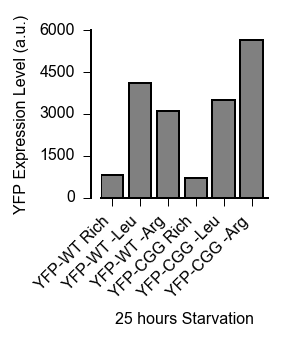

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5])

ax.bar(xlocations, meanSubtractedData['mean'][sampleOrder], align='edge', color='grey' )
ax.errorbar(xlocations+0.4, meanSubtractedData['mean'][sampleOrder], meanSubtractedData['sterr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(meanSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/hct116_lenti_yfpmean_25h_minustmpsubtracted_notnormalizedtorich.svg')
fig.savefig('../figures/hct116_lenti_yfpmean_25h_minustmpsubtracted_notnormalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/hct116_lenti_yfpmean_25h_minustmpsubtracted_notnormalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

####  YFP mean expression after 24h Starvation, -tmp mean subtracted, normalized to rich condition mean within cell lines ####

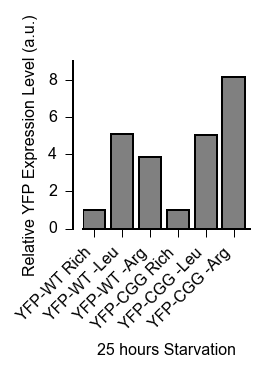

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5])

ax.bar(xlocations, meanSubtractedData['normalizedMean'][sampleOrder], align='edge', color = 'grey' )
ax.errorbar(xlocations+0.4, meanSubtractedData['normalizedMean'][sampleOrder], meanSubtractedData['normalizedStdErr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(meanSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Relative YFP Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/hct116_lenti_25h_minustmpsubtracted_normalizedtorich.svg')
fig.savefig('../figures/hct116_lenti_25h_minustmpsubtracted_normalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/hct116_lenti_25h_minustmpsubtracted_normalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

####  YFP median expression after 24h Starvation, -tmp mean subtracted, normalized to rich condition mean within cell lines ####

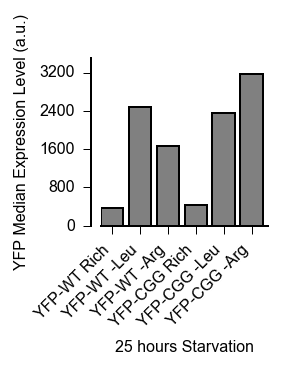

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5])

ax.bar(xlocations, medianSubtractedData['mean'][sampleOrder], align='edge', color='grey' )
ax.errorbar(xlocations+0.4, medianSubtractedData['mean'][sampleOrder], medianSubtractedData['sterr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(medianSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Median Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/hct116_lenti_yfpmedian_25h_minustmpsubtracted_notnormalizedtorich.svg')
fig.savefig('../figures/hct116_lenti_yfpmedian_25h_minustmpsubtracted_notnormalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/hct116_lenti_yfpmedian_25h_minustmpsubtracted_notnormalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

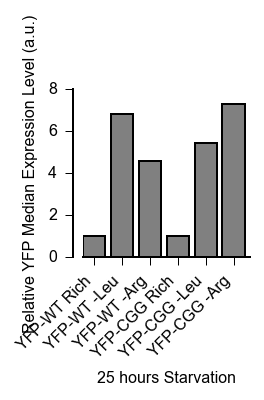

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5])

ax.bar(xlocations, medianSubtractedData['normalizedMean'][sampleOrder], align='edge', color = 'grey' )
ax.errorbar(xlocations+0.4, medianSubtractedData['normalizedMean'][sampleOrder], medianSubtractedData['normalizedStdErr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(medianSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Relative YFP Median Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/hct116_lenti_yfpmedian_25h_minustmpsubtracted_normalizedtorich.svg')
fig.savefig('../figures/hct116_lenti_yfpmedian_25h_minustmpsubtracted_normalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/hct116_lenti_yfpmedian_25h_minustmpsubtracted_normalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

## Analysis v2 :  examining histograms & scatterplots of log-transformed data with FLowCytometryTools to determine gating  ##

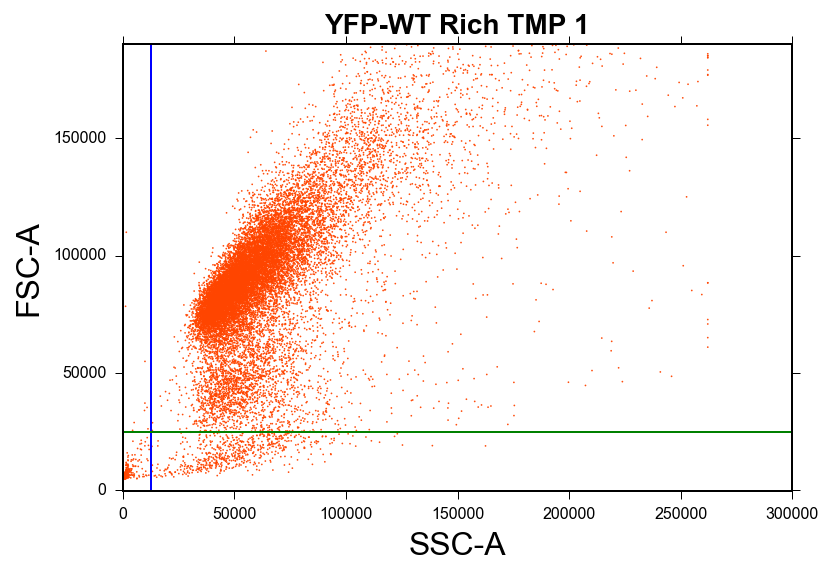

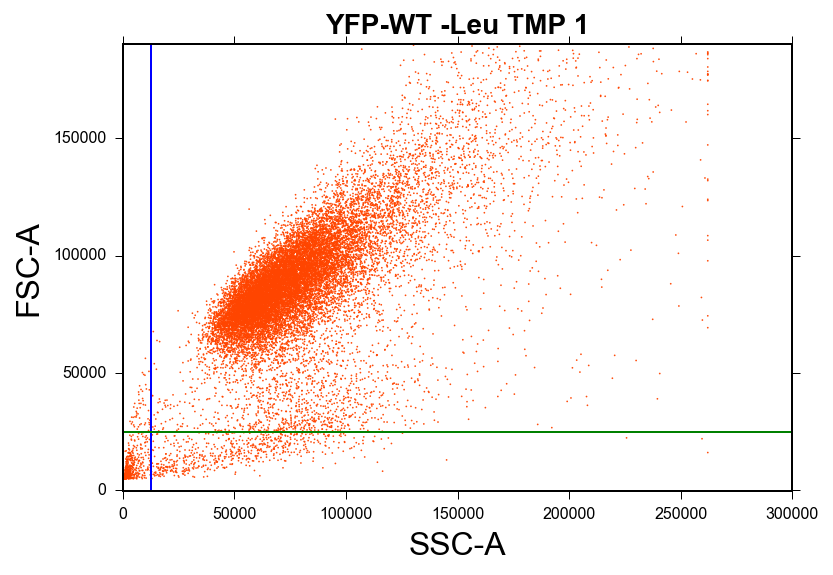

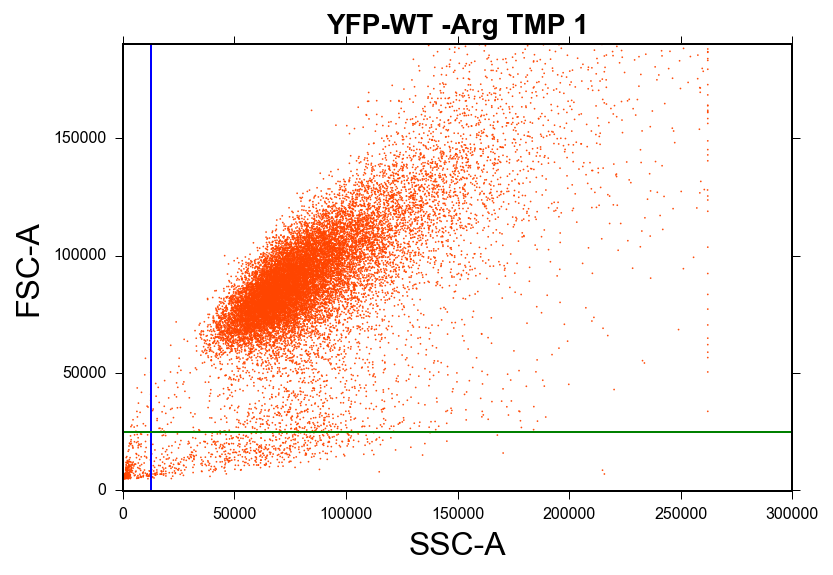

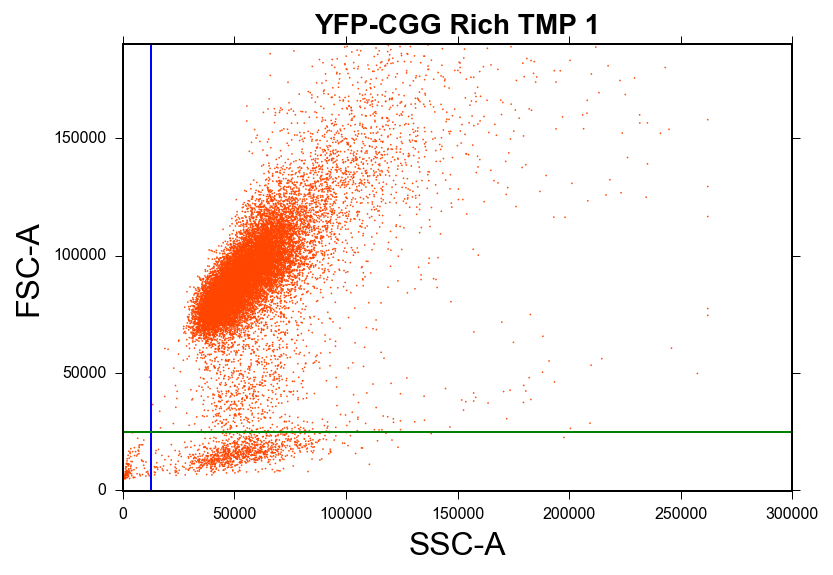

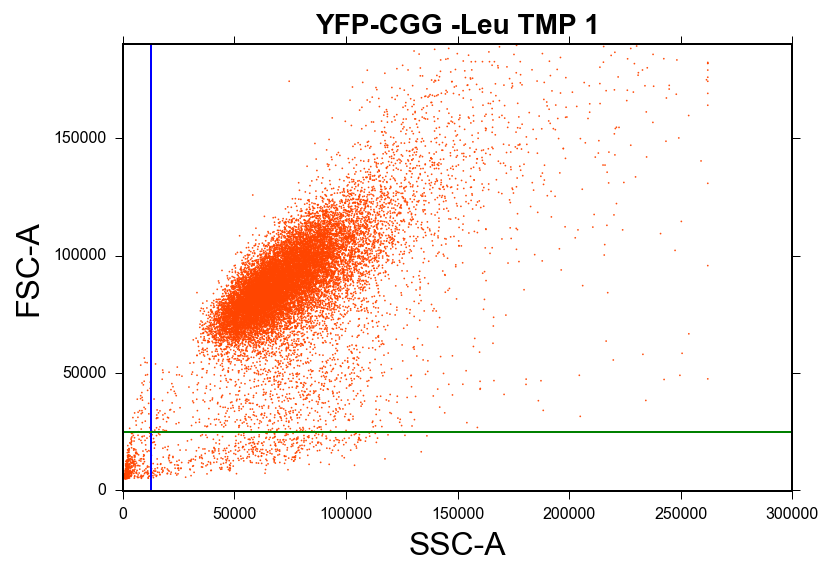

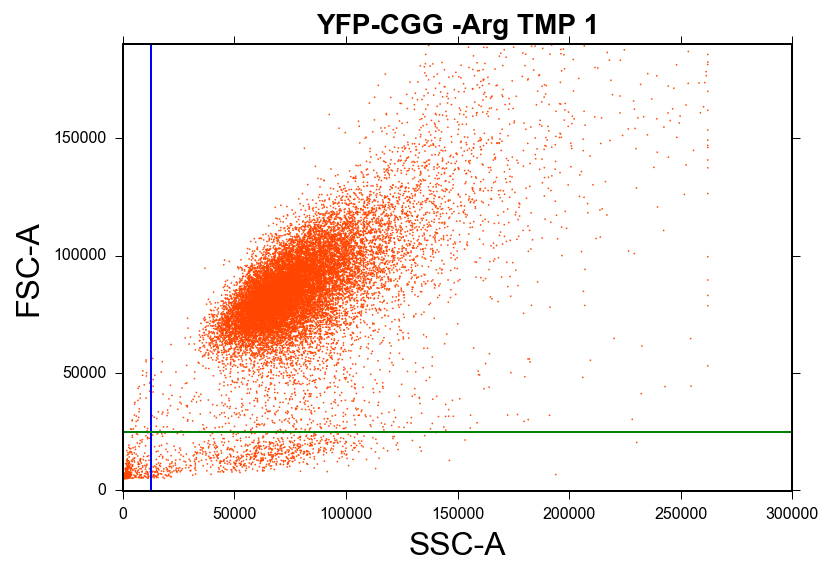

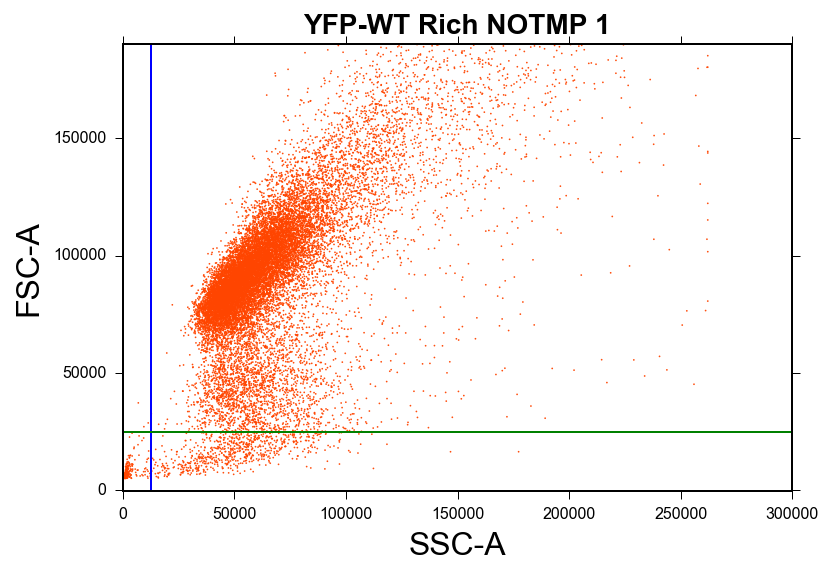

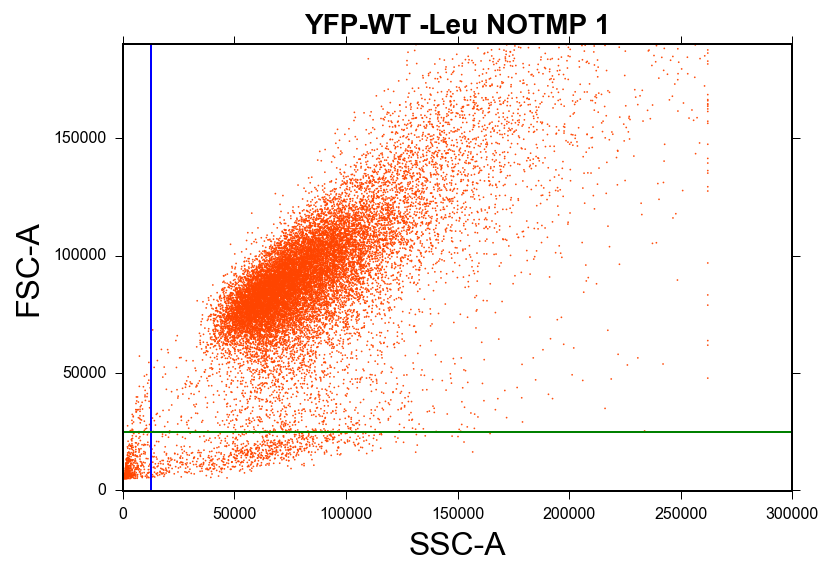

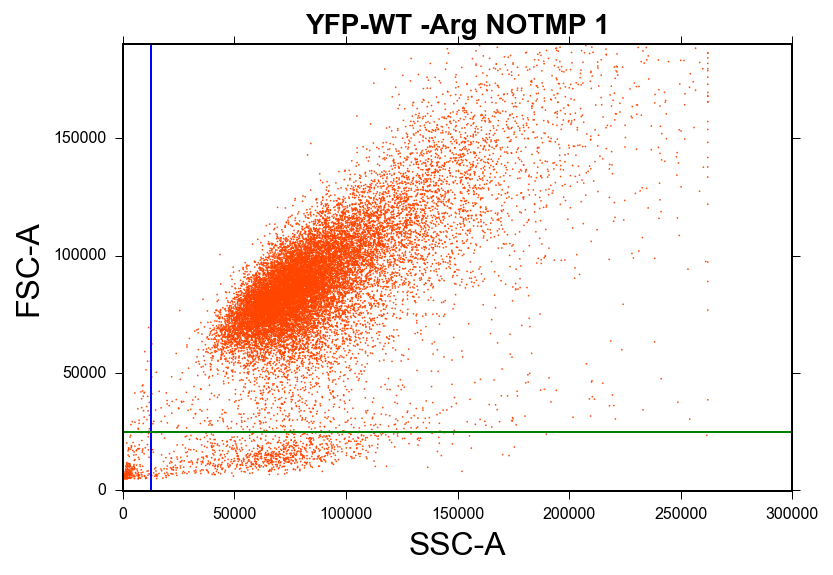

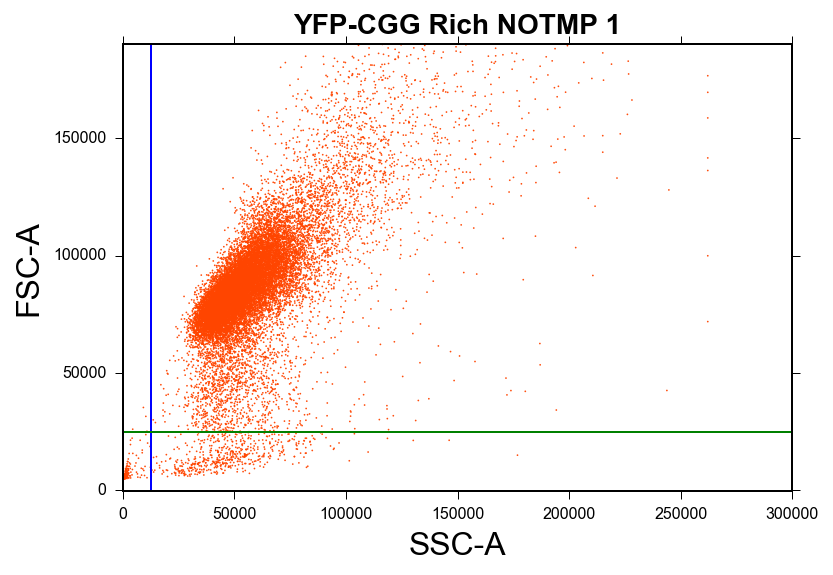

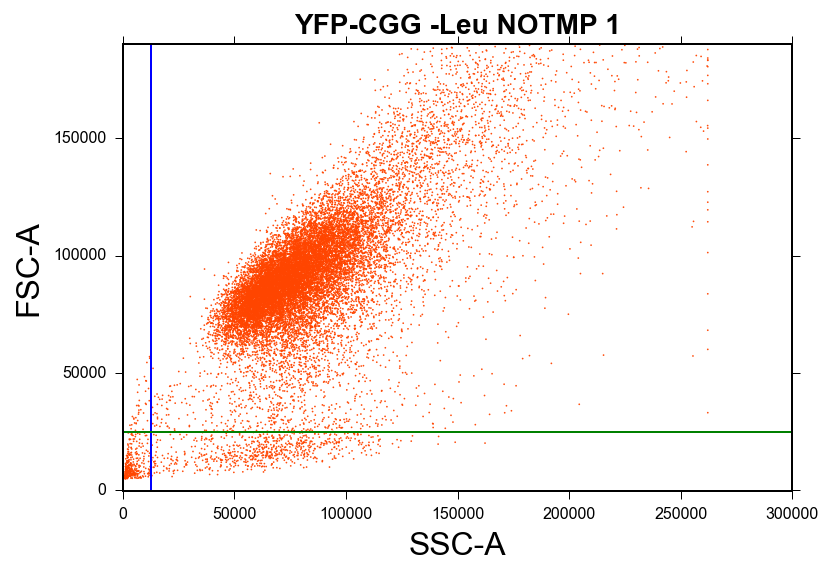

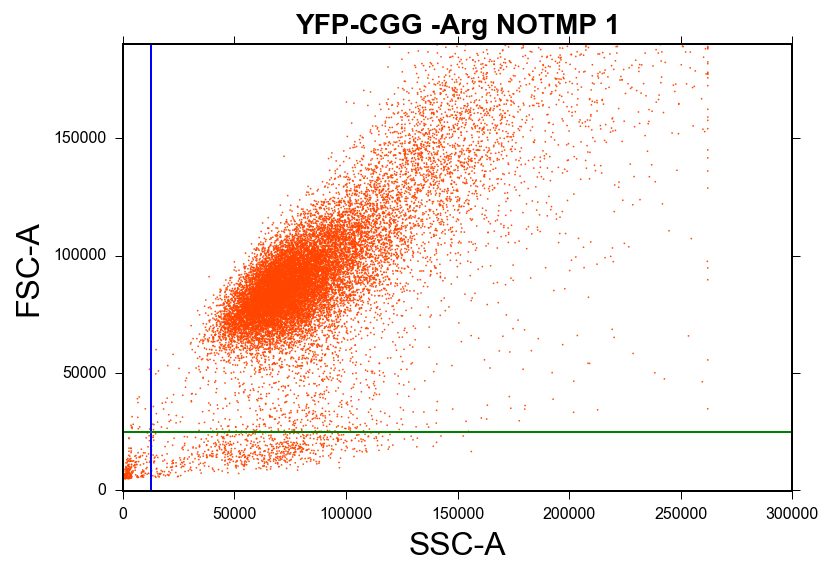

In [25]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

fcsFiles = !ls ../fcs_files/Specimen_005*.fcs

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    #print plotsample.ID
    #print plotsample.channel_names  #names of lasers
    #print plotsample.channels  #useful: gives voltage values for all channels so I can keep this consisent 
    #print type(plotsample.data) #this is a pandas data frame with entries for fsc,ssc, and each laser, and time. 
    #print plotsample.data[['FITC-A', 'PE-A']][:10]  #this prints the 1st 10 entries in each column for FITC/mCherry values
    #plotdata = plotsample.data
    #print plotdata['FITC-A'].describe()   #this prints overall statistics about the data for this sample.
    #print plotdata['FITC-A'].median()
    #print plotdata['PE-A'].median()
    #print plotdata.shape[0] #how many events are in the data"tube"
    
    #define gates based on visual analysis of scatter plot
    fsc_gate = ThresholdGate(25000.0, 'FSC-A', region='above')
    ssc_gate = ThresholdGate(12500.0, 'SSC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=200)   # b controls the location where the transformation shifts from linear to log. The optimal value for this parameter depends on the range of your data. For smaller ranges, try smaller values of b. So if your population doesn’t show up well, just adjust b.
    axTitle = plotsample.ID
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(-100,190000)
    ax.set_xlim(-100,300000)
    ax.set_title( axTitle, fontsize=14, fontweight='bold')
    #tsample.plot('FITC-A', color='green', bins=100) #plots a 1D histogram of FITC
    tsample.plot(['SSC-A', 'FSC-A'], kind='scatter', color='orangered', gates=[ssc_gate, fsc_gate], s=0.75, alpha = 0.95) #plots a 2d scatter plot. s value adjusts the weight of each point. alpha adjusts the transparency of each point between 1 and 0